# This notebook demonstrates how to use classes for generating and analyzing datasets

### Imports and arguments

In [1]:
from utils import segnn_utils
import os
import numpy as np
import sys
import importlib
import numpy as np

sys.argv = [
    'main.py', '--dataset=gravity', '--epochs=5', '--max_samples=3000',
    '--model=segnn', '--lmax_h=1', '--lmax_attr=1', '--layers=4',
    '--hidden_features=64', '--subspace_type=weightbalanced', '--norm=none',
    '--batch_size=100', '--gpu=1', '--weight_decay=1e-12', '--target=pos'
]
parser = segnn_utils.create_argparser()
args = parser.parse_args()


# Creating simulations (programatically)

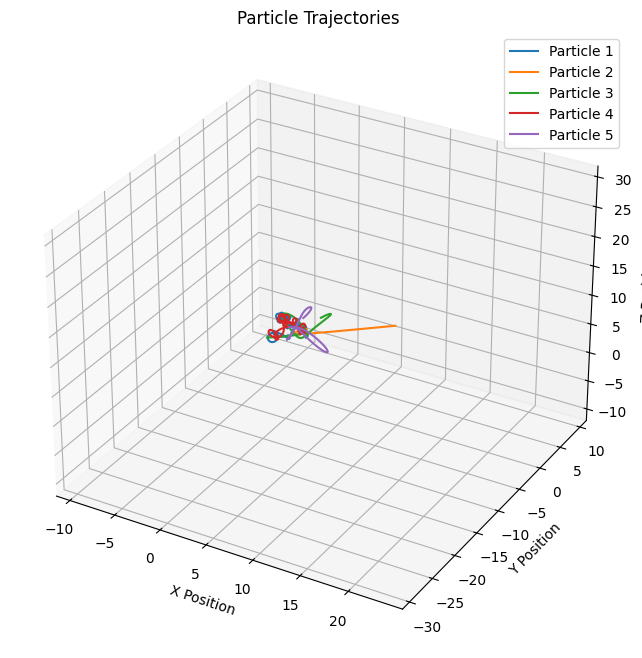

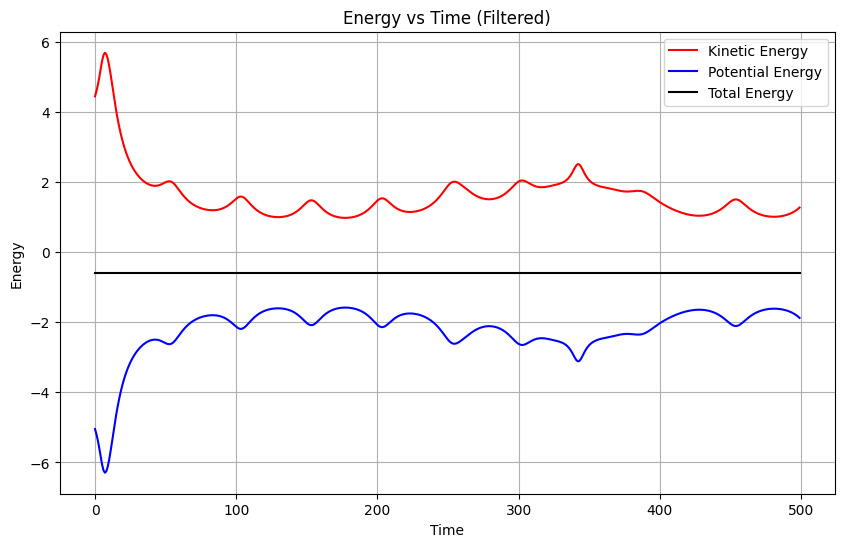

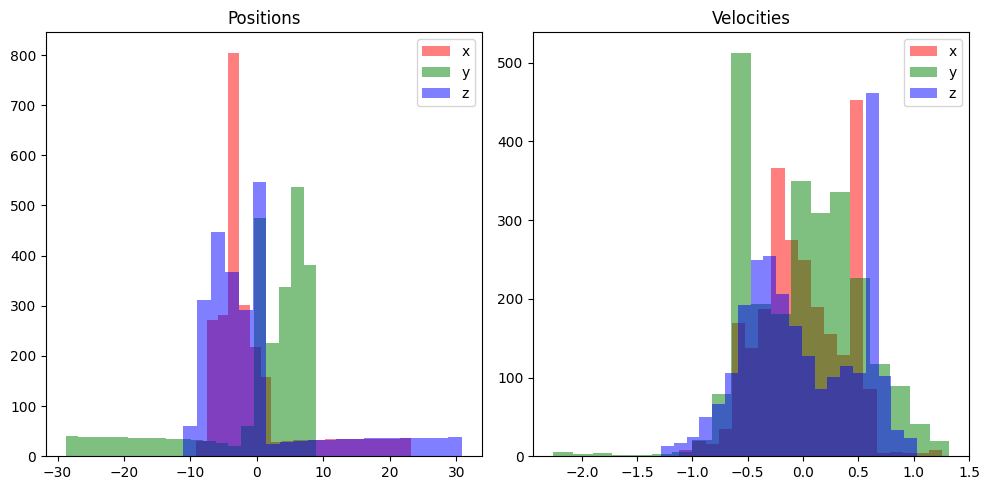

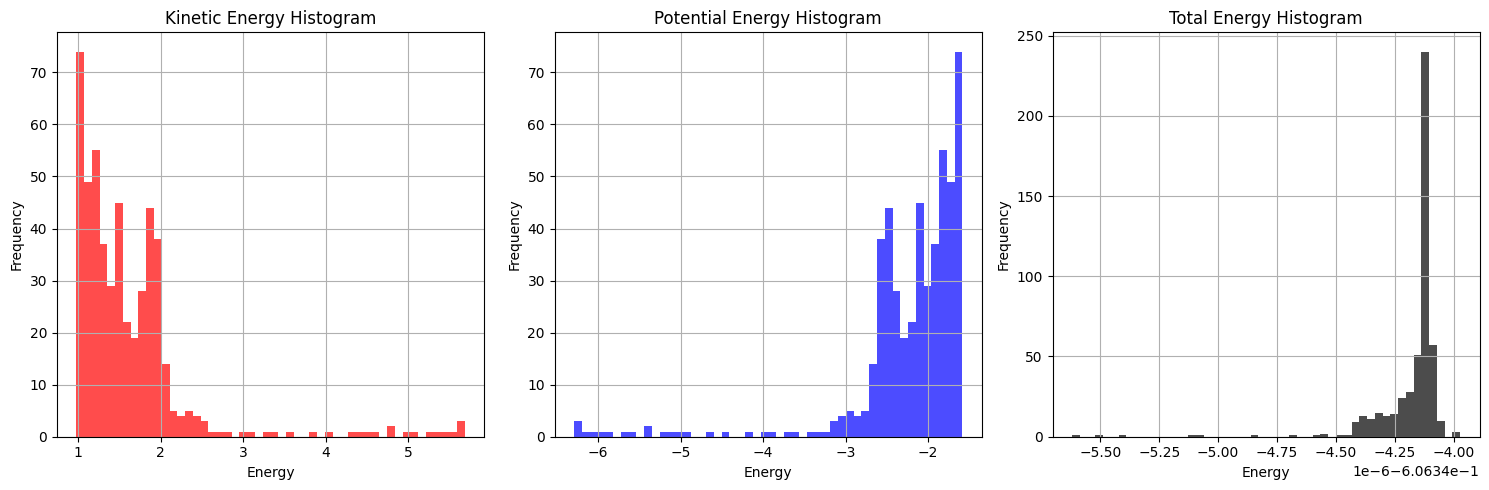

In [2]:
import datasets.nbody.dataset.synthetic_sim as synthetic_sim
%matplotlib inline
importlib.reload(synthetic_sim)
np.random.seed(43)


sim = synthetic_sim.GravitySim(n_balls=5, loc_std=1)

loc, vel, force, mass = sim.sample_trajectory(T=50000, sample_freq=100)

sim.plot_trajectory_static(loc)
sim.plot_energies(loc, vel, mass)
sim.plot_histograms(loc, vel)
sim.plot_energy_distribution(loc, vel, mass, bins=50)

# Plotting interactive trajectories
use the slider to step through the simulation

In [3]:
boxSize = 5
output_dims = 3
sim.interactive_trajectory_plot_all_particles_3d(loc, None,
                                                 None,
                                                 boxSize=boxSize, dims=output_dims, offline_plot=False)


# Extending existing simulation


In [5]:
new_loc, new_vel, new_force, mass = sim.sample_trajectory(T=10000, sample_freq=100, og_pos_save=loc, og_vel_save=vel,
                                                          og_force_save=force)

sim.interactive_trajectory_plot_all_particles_3d(new_loc, predicted_pos=None, particle_index=None,
                                                 boxSize=boxSize, dims=output_dims, offline_plot=False)

# Interactive plot of predicted values

In [6]:
sim.interactive_trajectory_plot_all_particles_3d(new_loc, new_loc+new_loc.mean()*7,
                                                 None,
                                                 boxSize=boxSize, dims=output_dims, offline_plot=False)


### Its possible to specify a particle of interest

In [7]:
particle = 0
sim.interactive_trajectory_plot_all_particles_3d(new_loc, new_loc+new_loc.mean()*7,
                                                 particle,
                                                 boxSize=boxSize, dims=output_dims, offline_plot=False)

# Generating datasets
 Generating multiple simulations and saving them to the specified folder
 
To recreate the datasets used in this work, navigate to ```datasets/nbody/dataset/``` and run either
```bash
python3 -u generate_dataset.py --simulation=charged --num-train 10000 --seed 43 --suffix small
```
or
```bash
python3 -u generate_dataset.py --simulation=gravity --num-train 10000 --seed 43 --suffix small


# Working with dataset class

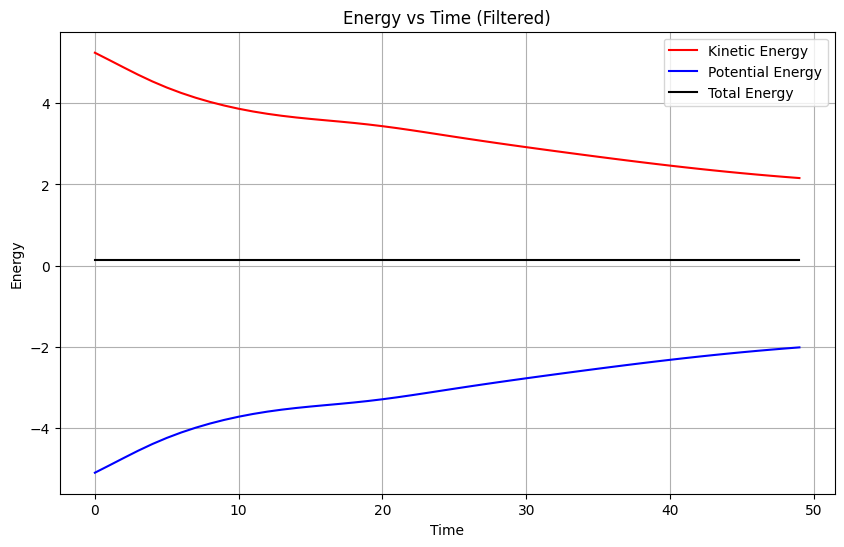

In [8]:
import datasets.nbody.dataset_gravity as dataset_gravity
%matplotlib inline
importlib.reload(dataset_gravity)

dataset_train = dataset_gravity.GravityDataset(partition='train', dataset_name=args.nbody_name,
                                               max_samples=args.max_samples, neighbours=args.neighbours,
                                               target=args.target)

# getter for a single simulation data
loc, vel, force, mass = dataset_train.get_one_sim_data(5)

# access simulation instance
dataset_train.simulation.plot_energies(loc, vel, mass)

# Plotting trajectories

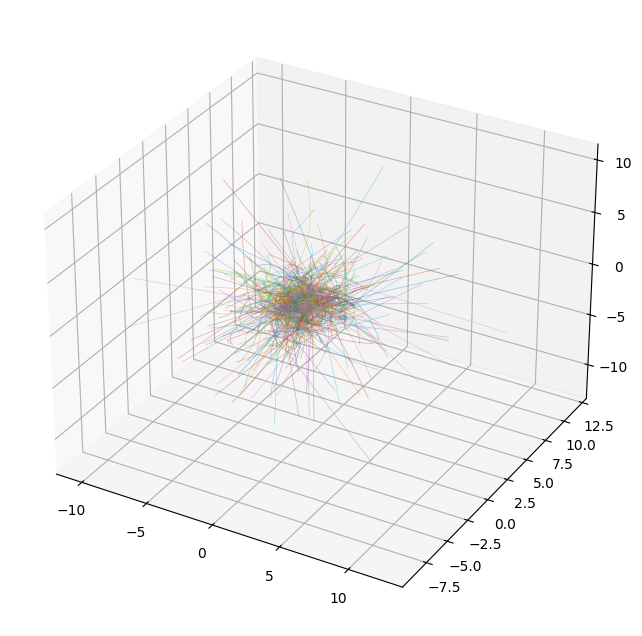

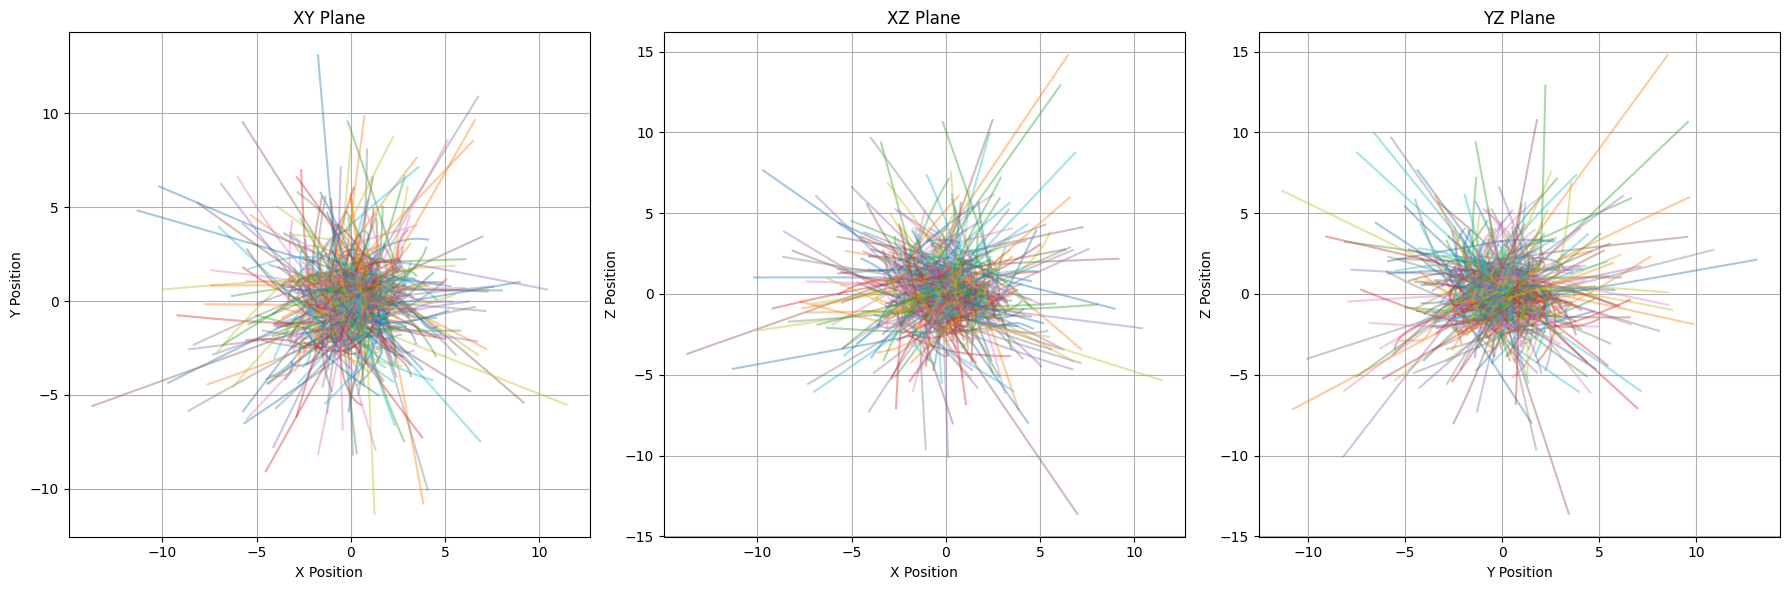

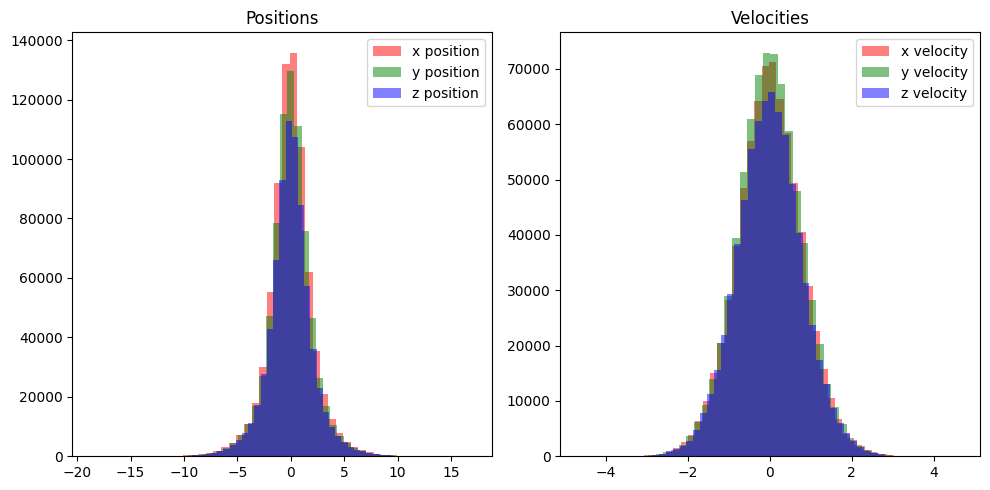

In [16]:
loc, vel, force, mass = dataset_train.data

# I suppose this is useless but if anyone wanted to see the actual data
dataset_train.plot_trajectories_static(loc, max_sims=100)
# also in 2d
dataset_train.plot_trajectories_static_3D_to_2D(loc, max_sims=100)

# plot distribution of all simulations
dataset_train.plot_histograms(loc, vel, bins=50)

# Plotting energies

This can take a while...


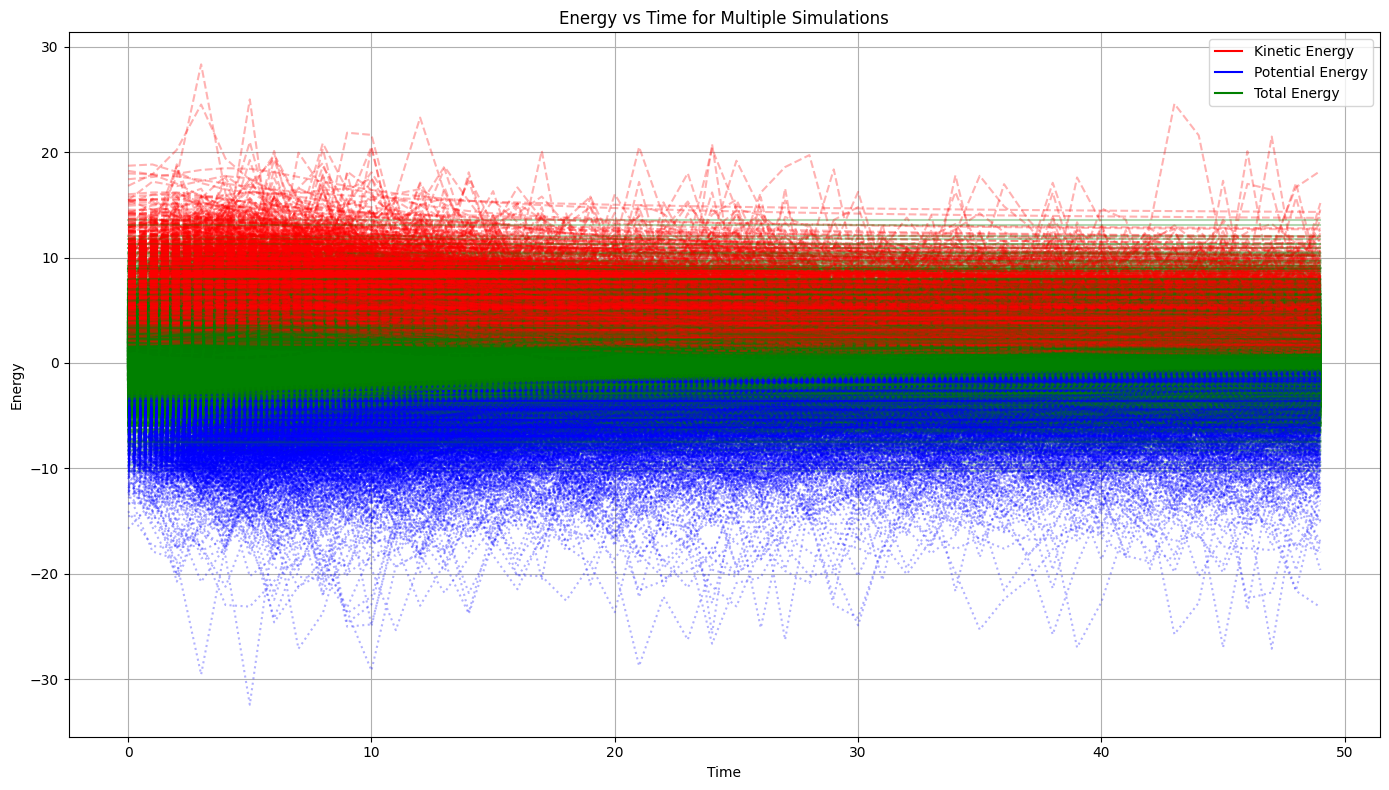

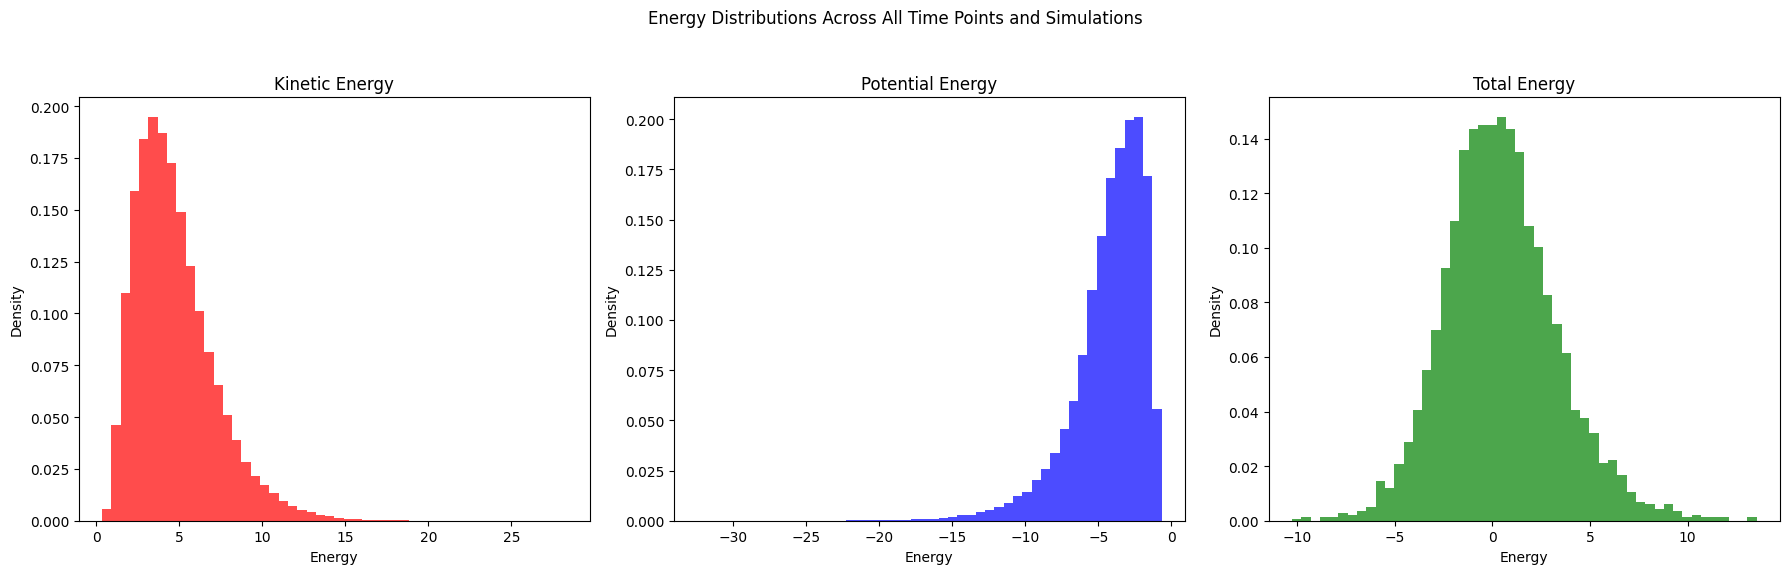

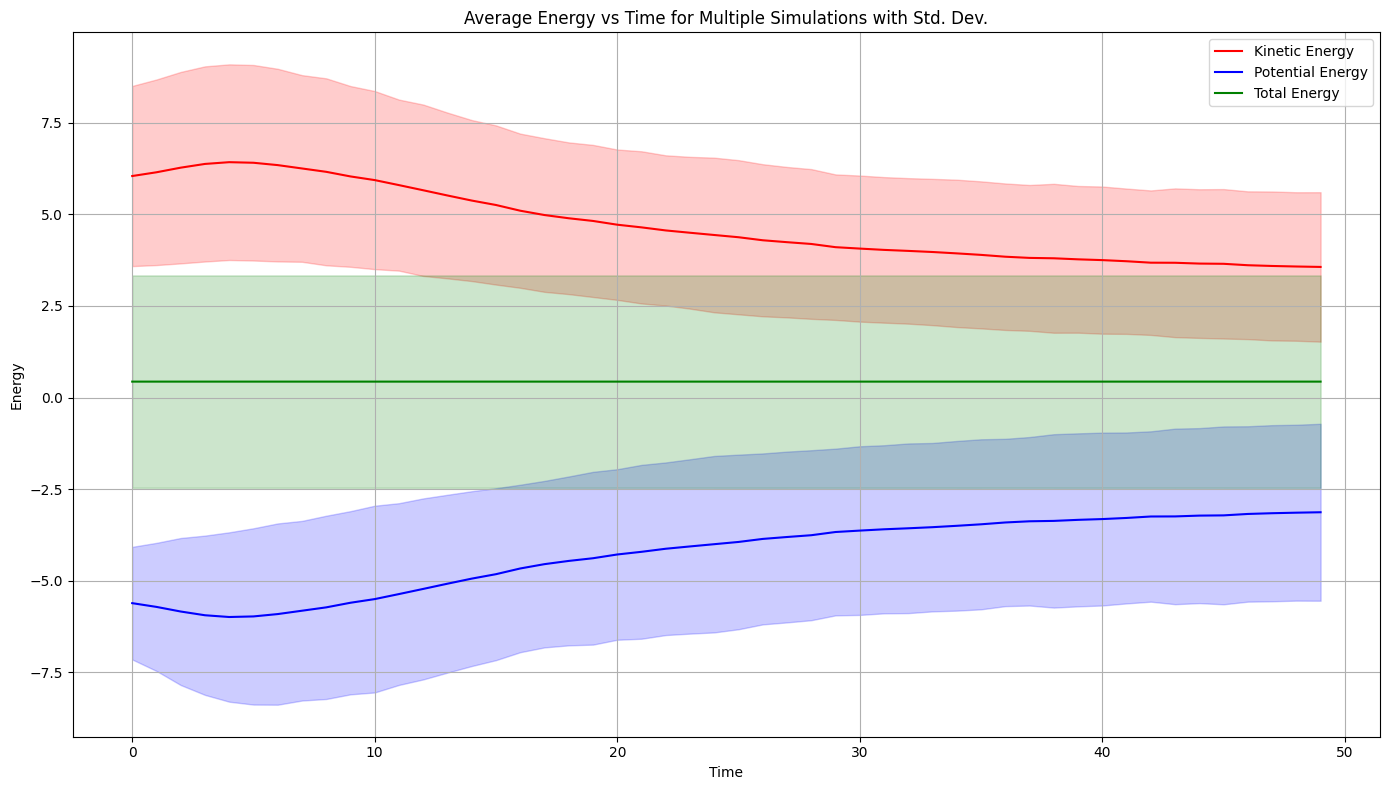

In [17]:
# If anyone wondered how it looks like
print("This can take a while...")
dataset_train.plot_energies_of_all_sims()

# distribution of energies of all simulations
dataset_train.plot_energy_distributions_across_all_sims()

# stats
dataset_train.plot_energy_statistics()